In [20]:
%matplotlib inline

import matplotlib.pylab as plt
import seaborn as sns
import sys 

!{sys.executable} -m pip install app-store-scraper
!{sys.executable} -m pip install tzlocal

In [19]:
import pandas as pd

# for building in wait times
import random
import time

# for keeping track of timing
import datetime as dt

# for scraping app info from App Store
from itunes_app_scraper.scraper import AppStoreScraper

# for scraping app reviews from App Store
from app_store_scraper import AppStore

# for pretty printing data structures
from pprint import pprint
from tzlocal import get_localzone

## Scrape App Store reviews using the app_store_scraper library

Homepage: https://github.com/cowboy-bebug/app-store-scraper

---

In [20]:
## Instantiate App Store class for desired app
app_ = AppStore(
    country='ph',        # required, 2-letter code
    app_name='gcash',    # required, found in app's url
    app_id=520020791     # required, found in app's url
) 
    
app_.review(
    how_many=10000, # upperbound limit
    after=dt.datetime(2019, 12, 31),
    sleep=random.randint(2, 3)
)

2021-06-04 15:37:05,768 [INFO] Base - Initialised: AppStore('ph', 'gcash', 520020791)
2021-06-04 15:37:05,769 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/ph/app/gcash/id520020791
2021-06-04 15:37:12,859 [INFO] Base - [id:520020791] Fetched 28 reviews (28 fetched in total)
2021-06-04 15:37:23,819 [INFO] Base - [id:520020791] Fetched 68 reviews (68 fetched in total)
2021-06-04 15:37:35,670 [INFO] Base - [id:520020791] Fetched 96 reviews (96 fetched in total)
2021-06-04 15:37:45,129 [INFO] Base - [id:520020791] Fetched 135 reviews (135 fetched in total)
2021-06-04 15:37:52,469 [INFO] Base - [id:520020791] Fetched 164 reviews (164 fetched in total)
2021-06-04 15:38:02,696 [INFO] Base - [id:520020791] Fetched 199 reviews (199 fetched in total)
2021-06-04 15:38:12,043 [INFO] Base - [id:520020791] Fetched 240 reviews (240 fetched in total)
2021-06-04 15:38:21,381 [INFO] Base - [id:520020791] Fetched 284 reviews (284 fetched in total)
2021-06-04 15:38:31,461 [INFO] Base -

## Data preprocessing
---

In [64]:
# reviews are stored as distionary objects
reviews = app_.reviews

# Convert list of dicts to Pandas DataFrame and write to csv
review_df = pd.DataFrame(reviews)
# review_df.to_csv('Data/' + app_name + '.csv', index=False)

In [65]:
review_df.sort_values(by=['date'])

,date,review,title,userName,isEdited,rating,developerResponse
1388,2019-12-31 08:40:47,Before i can use the app with adjusting the ti...,Why do this app has to be dependent on my phon...,devicetimeprompt,False,1,NaN
75,2020-01-01 02:10:56,Gcash is a great app BUT if you tried buying s...,Needs improvement,jazuming,False,3,NaN
2327,2020-01-01 11:26:33,ANDAMI NG VIDEOS SA YOUTUBE RIGHT NOW NA SCAM ...,GCASH IS A TOTAL SCAM,virient,False,1,NaN
397,2020-01-01 15:11:30,I cannot log in my email account to my gcash a...,Email registration error,mAsayapa,False,3,NaN
32,2020-01-01 19:14:19,Been an avid user for a few years but recently...,Customer Support during issues is trash!,bambinusPHL,False,1,NaN
...,...,...,...,...,...,...,...
649,2021-06-02 10:36:36,the app is great! i load my own umber using g...,LOAD,dudzzsszz,False,4,NaN
1096,2021-06-02 15:35:19,So annoying. Always need to update to use it pota,Annoying,wensy dj,False,3,NaN
182,2021-06-02 17:20:04,"First, why is it that it take at least a day f...",Activity/Transaction History,Joelnyap,False,2,NaN
2546,2021-06-03 01:37:56,My app was recently updated and the transactio...,No More Transaction History,Jeannie116,False,1,NaN


In [66]:
as_df = review_df.drop([1388])
as_df.sort_values(by=['date'])

,date,review,title,userName,isEdited,rating,developerResponse
75,2020-01-01 02:10:56,Gcash is a great app BUT if you tried buying s...,Needs improvement,jazuming,False,3,NaN
2327,2020-01-01 11:26:33,ANDAMI NG VIDEOS SA YOUTUBE RIGHT NOW NA SCAM ...,GCASH IS A TOTAL SCAM,virient,False,1,NaN
397,2020-01-01 15:11:30,I cannot log in my email account to my gcash a...,Email registration error,mAsayapa,False,3,NaN
32,2020-01-01 19:14:19,Been an avid user for a few years but recently...,Customer Support during issues is trash!,bambinusPHL,False,1,NaN
1954,2020-01-02 01:43:34,Please keep up with 2020. It’s worse than dial...,2020 Outdate!,Charmed one ako,False,1,NaN
...,...,...,...,...,...,...,...
649,2021-06-02 10:36:36,the app is great! i load my own umber using g...,LOAD,dudzzsszz,False,4,NaN
1096,2021-06-02 15:35:19,So annoying. Always need to update to use it pota,Annoying,wensy dj,False,3,NaN
182,2021-06-02 17:20:04,"First, why is it that it take at least a day f...",Activity/Transaction History,Joelnyap,False,2,NaN
2546,2021-06-03 01:37:56,My app was recently updated and the transactio...,No More Transaction History,Jeannie116,False,1,NaN


In [132]:
as_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2548 entries, 0 to 2548
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2548 non-null   datetime64[ns]
 1   review             2548 non-null   object        
 2   title              2548 non-null   object        
 3   userName           2548 non-null   object        
 4   isEdited           2548 non-null   bool          
 5   rating             2548 non-null   int64         
 6   developerResponse  3 non-null      object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 141.8+ KB


In [95]:
# get all 1-star and 5-star reviews from the main dataframe and transfer them to a new one
filtered_df = as_df[(as_df.rating == 1) | (as_df.rating == 5)]
filtered_df.sort_values(by=['date'])

,date,review,title,userName,isEdited,rating,developerResponse
2327,2020-01-01 11:26:33,ANDAMI NG VIDEOS SA YOUTUBE RIGHT NOW NA SCAM ...,GCASH IS A TOTAL SCAM,virient,False,1,NaN
32,2020-01-01 19:14:19,Been an avid user for a few years but recently...,Customer Support during issues is trash!,bambinusPHL,False,1,NaN
1954,2020-01-02 01:43:34,Please keep up with 2020. It’s worse than dial...,2020 Outdate!,Charmed one ako,False,1,NaN
323,2020-01-02 05:52:51,I tried so many times to cash in but it every ...,App refuses to let me cash in,Purchased Premium,False,1,NaN
97,2020-01-02 08:15:18,I downloaded this app and registered last Mond...,Worthless,Ayakagin,False,1,NaN
...,...,...,...,...,...,...,...
292,2021-06-02 03:01:15,I had updated my gcash account as prompted. I ...,Dissatisfied and wary client,nanay baby,False,1,NaN
2328,2021-06-02 04:45:55,Dapat pwedi parin gamitin ang gcash app kahit ...,Hassle,zylershao,False,1,NaN
2184,2021-06-02 05:24:18,di ko ma buksan yung gcash ko ngayon sa bagong...,CANT OPEN,JIREHFAITHPARAGOSO,False,1,NaN
2546,2021-06-03 01:37:56,My app was recently updated and the transactio...,No More Transaction History,Jeannie116,False,1,NaN


In [133]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 0 to 2548
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1669 non-null   datetime64[ns]
 1   review             1669 non-null   object        
 2   title              1669 non-null   object        
 3   userName           1669 non-null   object        
 4   isEdited           1669 non-null   bool          
 5   rating             1669 non-null   int64         
 6   developerResponse  1 non-null      object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 92.9+ KB


## Export App Store reviews dataframe as a csv file
---

In [135]:
filtered_df.to_csv('data/app_store_reviews.csv', index=False)

## Data exploration
---

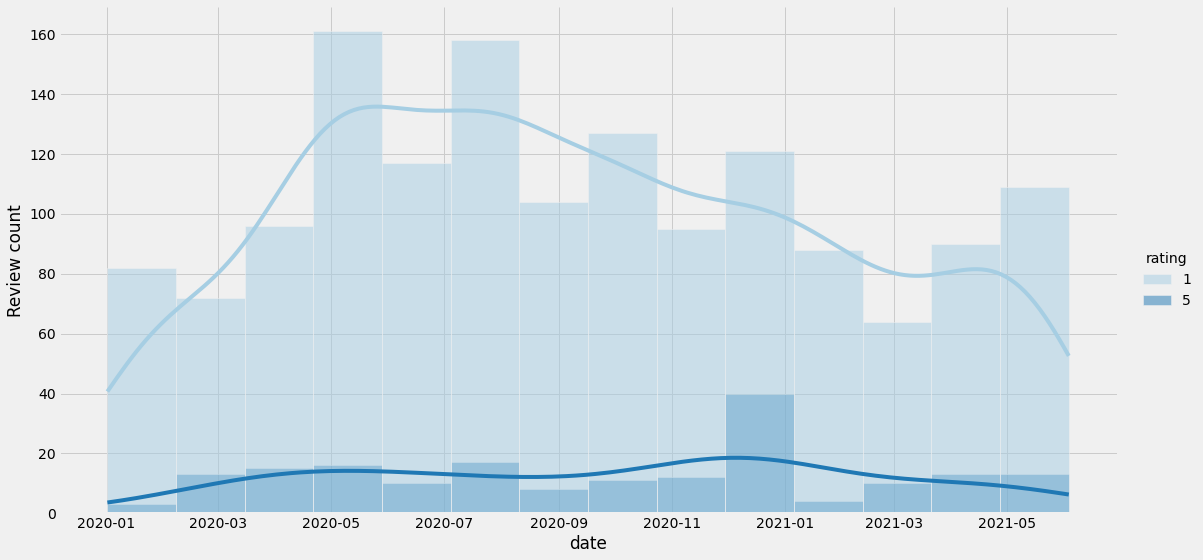

In [131]:
import matplotlib.dates as mdates

plt.style.use('fivethirtyeight')
# plt.figure(figsize=(10,8))

s = sns.displot(data=filtered_df, x='date', hue='rating', height=8, aspect=2, palette='Paired', kde=True)
s.set(ylabel='Review count')
# s.xaxis.set_major_formatter(dates.DateFormatter("%d-%b-%Y"))